In [1]:
#learning
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

#data processing
from keras.datasets import mnist
from keras.utils import to_categorical 
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#directory info
import os

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


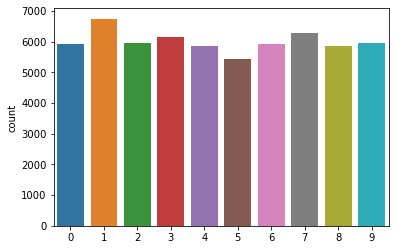

In [3]:
sns.countplot(train_y);

In [4]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

train_x = np.ceil(train_x.astype("float32") / 255.0)
test_x = np.ceil(test_x.astype("float32") / 255.0)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


This image is a: 5


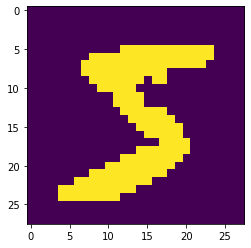

In [5]:
plt.imshow(train_x[0][:,:,0]);
print("This image is a:", train_y[0].argmax())

In [6]:
model = tf.keras.Sequential(
    [
        Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
        Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding="same"),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding="same"),
        MaxPool2D(pool_size=(2,2), strides=(2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]
)
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss='CategoricalCrossentropy', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [7]:
gpus = tf.config.list_physical_devices('GPU')
print("GPUs available: ", gpus)
if gpus:
    print("Training on device: ", gpus[0])
    with tf.device("/GPU:0"):
        model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y))
else:
    print("No GPUs found. Training on CPU.")
    model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y))

GPUs available:  []
No GPUs found. Training on CPU.
Epoch 1/30
1875/1875 [==============================] - 110s 58ms/step - loss: 0.3830 - accuracy: 0.8751 - val_loss: 0.0483 - val_accuracy: 0.9839
Epoch 2/30
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 3/30
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0654 - accuracy: 0.9806 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 4/30
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 5/30
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0534 - accuracy: 0.9841 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 6/30
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0380 - val_accuracy: 0.9896
Epoch 7/30
1875/1875 [==============================] - 108s 58ms/

In [8]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print('> %.3f' % (acc * 100.0))
model.save(os.getcwd() + "\models\DigitModel", overwrite=True)
print("Model saved successfully!")

> 99.200
INFO:tensorflow:Assets written to: c:\Users\danie\OneDrive\Programming\ML\nn-digits-app\backend\models\DigitModel\assets
Model saved successfully!
